In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from graphviz import Digraph

In [22]:
import importlib
import micrograd
import utils
importlib.reload(micrograd)
importlib.reload(utils)

from micrograd import Value
from utils import draw_graph

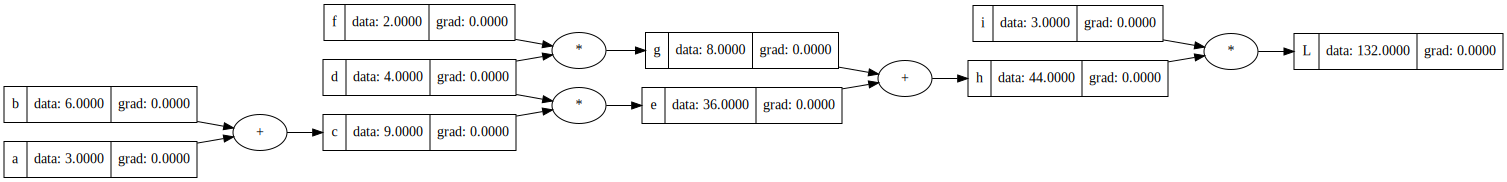

In [23]:
a = Value(3); a.label = 'a'
b = Value(6); b.label = 'b'
c = a + b; c.label = 'c'

d = Value(4); d.label = 'd'
e = c * d; e.label = 'e'

f = Value(2); f.label = 'f'
g = f * d; g.label = 'g'

h = g + e; h.label = 'h'
i = Value(3); i.label = 'i'
L = i * h; L.label = 'L'
draw_graph(L)

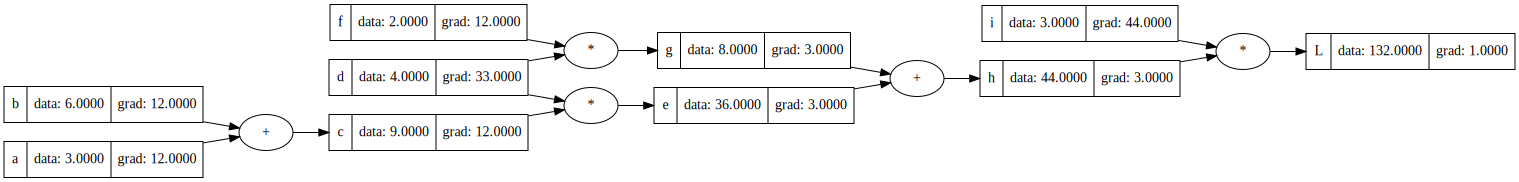

In [24]:
L.backward()
draw_graph(L)

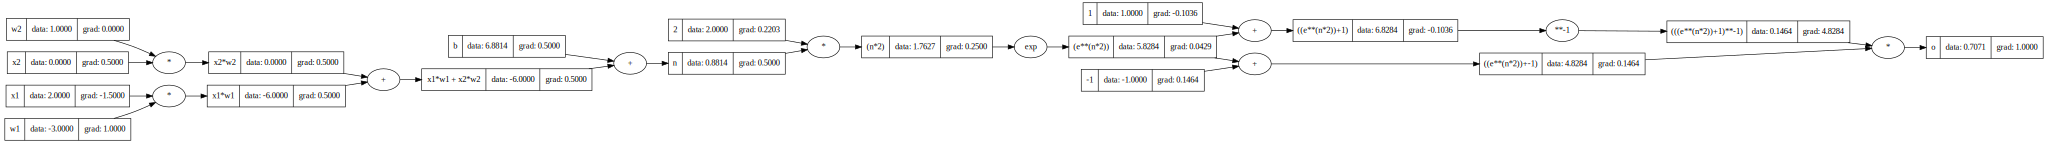

In [25]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ----
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ----
o.label = 'o'
o.backward()
draw_graph(o)